We use the integrator in `escritoire/reachability/BFFPSV18`.

In [8]:
#include("../BFFPSV18/BFFPSV18.jl");
#using BenchmarkTools, Plots

In [7]:
using ReachabilityAnalysis, Reachability
IA = IntervalArithmetic
using BenchmarkTools, Plots

In [4]:
# Example from Althoff's thesis, section 3.2.3
# x' = Ax + u
A = [-1 -4  0  0  0;
      4 -1  0  0  0;
      0  0 -3  1  0;
      0  0  -1 -3 0;
      0  0   0 0  -2.]
X0 = Hyperrectangle(low=fill(0.9, 5), high=fill(1.1, 5));
U = Hyperrectangle(low=[0.9, -0.25, -0.1, 0.25, -0.75], high=[1.1, 0.25, 0.1, 0.75, -0.25])
S = ConstrainedLinearControlContinuousSystem(A, I(5), Universe(5), U)
P = InitialValueProblem(S, X0)

opts = Options(:T => 5.0,
               :δ => 0.001,
               :N => 500,  # el N se puede sacar de T y de delta
               :vars=>[2, 3],
               :partition => [[1], [2], [3], [4], [5]],
               #:set_type => Hyperrectangle{Float64, Vector{Float64}, Vector{Float64}},
               :set_type => Interval{Float64, IA.Interval{Float64}},
               :row_blocks => [[2], [3]],
               :column_blocks => [[1], [2], [3], [4], [5]],
               :num_type => Float64,
               :block_indices => [2, 3],
               :sparse=>false);

In [9]:
using Reachability

@btime Reachability.solve(P, Options(:T=>5.0), op=BFFPSV18(Options(:δ=>0.01)));

  9.709 ms (233774 allocations: 12.07 MiB)


In [13]:
sol = ReachabilityAnalysis.solve_BFFPSV18(P, opts);

In [12]:
@btime sol = ReachabilityAnalysis.solve_BFFPSV18($P, $opts);

  1.840 ms (15381 allocations: 1.11 MiB)


In [14]:
typeof(sol)

Array{SparseReachSet{CartesianProductArray{Float64,Interval{Float64,IntervalArithmetic.Interval{Float64}}}},1}

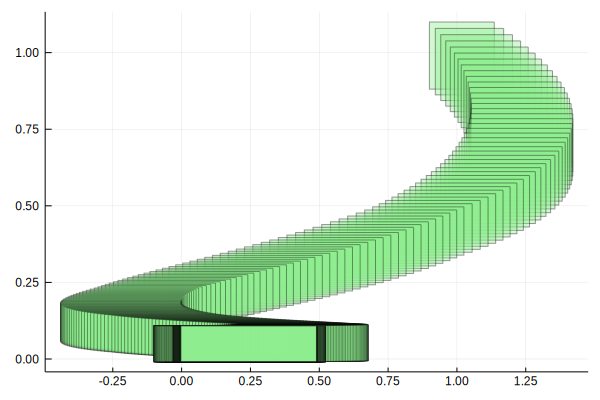

In [14]:
plot([set(sol[i]) for i in eachindex(sol)], color=:lightgreen, alpha=0.4)